In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

In [12]:
def markedList(markedList,N):
    oracleList = np.ones(2**N)
    for element in markedList:
        oracleList[element] = -1
    return oracleList.tolist()


def oracle(markedList,N):
    qreg = QuantumRegister(N)
    qc = QuantumCircuit(qreg,name='Oracle')
    qc.diagonal(markedList,qreg)
    return qc


def diffusion(N):
    qreg = QuantumRegister(N)
    difCirc = QuantumCircuit(qreg,name='Diffusion')
    difCirc.h(qreg)
    
    aux = markedList([0],N)
    qcAux = oracle(aux,N)
    difCirc.append(qcAux,range(N))
    
    difCirc.h(qreg)
    return difCirc

def grover(marked,N,steps):
    qc = QuantumCircuit(N,N)
    qcOracle = oracle(markedList(marked,N),N)
    qcDiffusion = diffusion(N)
    qc.h(range(N))
    for i in range(steps):
        qc.append(qcOracle,range(N))
        qc.barrier()
        qc.append(qcDiffusion,range(N))
        qc.barrier()
    qc = transpile(qc,basis_gates=['cx','u3','h'],optimization_level=3)
    qc.barrier()
    qc.measure(range(N),range(N))
    return qc

def simul(qc):
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc,backend,shots=3000).result().get_counts()
    return result

In [13]:
N=9
limit = 2**N -1

qc = grover([0,1,int(limit/2),limit-1,limit],N,3)
#qc.draw(output='mpl')

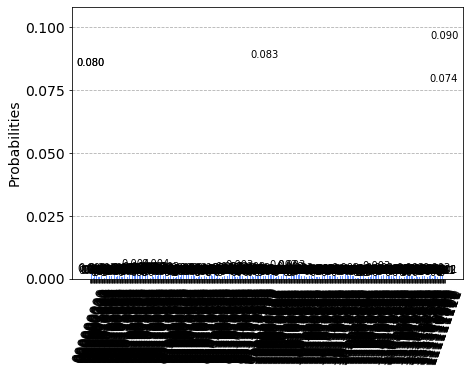

In [14]:
result_counts = simul(qc)
plot_histogram(result_counts)

In [15]:
for key in result_counts:
    if(result_counts[key]>20):
        print(key, '->', result_counts[key])

111111110 -> 221
000000001 -> 240
011111111 -> 249
000000000 -> 240
111111111 -> 270
